In [0]:
import warnings
warnings.simplefilter("ignore")

In [0]:
import numpy as np
import pandas as pd

# Modelo simple de regresion

In [0]:
X =pd.read_csv("X.csv")

In [0]:
y = X['NUM_GRAVEDAD']

In [0]:
X = X.drop('NUM_GRAVEDAD',axis=1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4)

In [136]:
print(f'Total de los datos {len(X)}')
print(f'60 % de los datos es {len(X_train)}')
print(f'40 % de los datos es {len(X_test)}')

Total de los datos 35472
60 % de los datos es 21283
40 % de los datos es 14189


In [137]:
X.head(1)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,9.0,15.0,1.0,1.0


# Regresion Lasso

In [0]:
from sklearn.linear_model import Lasso

model = Lasso()

Ajuste de los datos

In [139]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
predicted = model.predict(X_test)

In [141]:
predicted

array([1.46940849, 1.47731538, 1.47762021, ..., 1.47519435, 1.47560372,
       1.47737861])

In [142]:
predicted.shape

(14189,)

# Distribucion geometrica

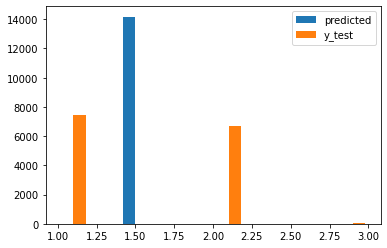

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted,y_test]);
plt.legend(['predicted','y_test']);


Debemos evaluar de forma más fina el comportamiento de nuestro modelo.

# Evaluando de forma más fina el comportamiento de nuestro modelo

El score r2 entre mas cercano al 1 es mejor, podemos entender su poder predictivo

In [144]:
model.score(X_test, y_test)

-0.00042531275498092214

Muy malo el Score para un primer modelo

In [145]:
y_test.shape

(14189,)

In [0]:
predicted=predicted.reshape(14189)

In [0]:
residuals = y_test - predicted

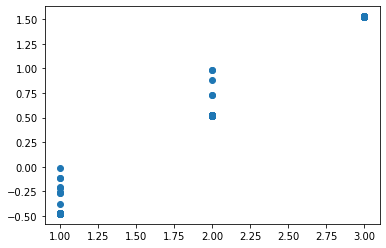

In [148]:
plt.scatter(y_test,residuals)

En esta grafica hay patrones que estan juntos por lo tanto es malo

In [0]:
ap_residuals = np.abs(residuals)/ y_test

Aplicando una escala logaritmica

In [0]:
lap_residuals = np.log(ap_residuals)

grafica logaritmica

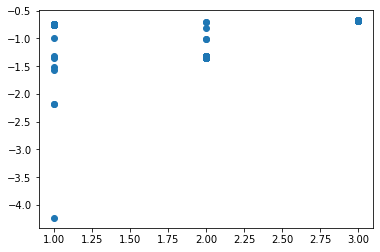

In [151]:
plt.scatter(y_test,lap_residuals)

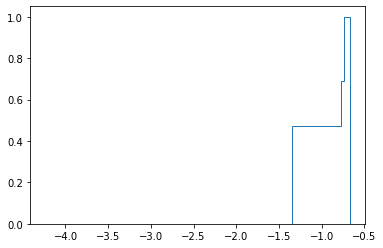

In [156]:
plt.hist(lap_residuals, bins = 100, density = 1, histtype = 'step', cumulative = True);

para el 100% de nuestros datos les fue mal

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

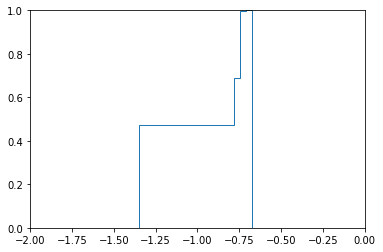

In [157]:
plt.hist(lap_residuals, bins = 100, density = 1, histtype = 'step', cumulative = True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

El error inferior de -1% para el 50% de los datos y el -0.75% inferior para el 100% de los *datos*